## 1. Introduction
The dataset is dedicated to the sale of various goods in the United States, indicating the order date, delivery date, product and customer information, etc. The dataset also includes the profit from sales and quantity, which, in turn, helps me to propose the idea of the company's development in the market and in relations with customers.

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [111]:
sales = pd.read_excel('Sales Report.xlsx')
sales.head()

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [112]:
returns = pd.read_excel('Returned.xlsx')
returns.head()

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Returned,Order ID
0,Yes,CA-2015-100762
1,Yes,CA-2015-100762
2,Yes,CA-2015-100762
3,Yes,CA-2015-100762
4,Yes,CA-2015-100867


## 2. Data description
The dataset has 21 columns and 9994 rows.
- Row ID - Row ID of each row
- Order ID - is a unique number used to identify the product
- Order date - the date when the customer ordered their product
- Ship Date - Delivery date
- Ship mode - type of delivery
- Customer ID - is a unique number used to identify the customer
- Customer Name - full name of the client
- Segment - various groups of potential customers in the market
- Country - is a country that has concluded a deal, in our situation there is only one country and that is the United States
- City - different cities of our country where goods are delivered
- State - the state to which the city belonged
- Postal code - is a set of letters or numbers that determine the location or postal address for delivery
- Region - city district
- Product ID - is a unique number used to identify the customer's product
- Category - is the type of product
- Sub-category - specific type of product
- Product Name - the name of the product that the customer has chosen
- Sales - the total price of the product with a discount
- Quantity - the number of products that have been selected
- Discount - discount percentage
- Profit - the total profit received from entrepreneurial activity       

In [113]:
sales.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

## 3. Research question
1. Show the minimum and maximum monthly profit in the period 2015-2019.
2. Find the number of deal for each of the top 10 states by sales for each half-year.
3. Find the 5 customers for each year who spend the most money on purchases.
4. Show the percentage of orders received during the holidays.
5. Show the number of distinct types of products ordered by each segment.
6. Using sample show the profits from each discount.
7. Find the number of subcategories for the technology for each year.

## 4. Data preparation

In [114]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9983 non-null   float64       
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [115]:
sales.shape

(9994, 21)

In [116]:
sales.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

In [117]:
# delete all rows containing null values
sales.dropna(how='any', inplace=True)

In [118]:
# I decided to remove the Row ID and the country because I can use the index as the Row ID and the country only includes one value (USA).
sales.drop(['Row ID', 'Country'], axis=1, inplace=True)

In [119]:
sales.shape

(9983, 19)

In [120]:
# deleting returned products
sales.drop(sales.loc[sales['Order ID'].isin(returns['Order ID'])].index, inplace=True)

In [121]:
# replace all spaces with underscores in the column names by using the 'str.replace' method
sales.columns = sales.columns.str.replace(' ', '_')
sales.columns

Index(['Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID',
       'Customer_Name', 'Segment', 'City', 'State', 'Postal_Code', 'Region',
       'Product_ID', 'Category', 'Sub-Category', 'Product_Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

## 5. Data analysis and visualisation

### 7.1 Q1: Show the minimum and maximum monthly profit in the period 2015-2019.
I want to show the max and min profit for each month and in order to first I separated order date then grouped it by month_year.

In [122]:
# data preparation for Q1
# I separate the year, month and month_year from the order date
sales['year'], sales['month'] = sales['Order_Date'].dt.year, sales['Order_Date'].dt.month
sales['month_year'] = sales['Order_Date'].dt.to_period('M').astype(str)
sales.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Postal_Code,...,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,year,month,month_year
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2017,11,2017-11
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2017,11,2017-11
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036.0,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2017,6,2017-06
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2016,10,2016-10
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2016,10,2016-10


In [123]:
# Grouped by month_year and summarize the profit
Q1_profit=sales[['month_year', 'Profit']].groupby(by='month_year', as_index=False).sum()
Q1_profit.head()

,month_year,Profit
0,2015-01,2435.1079
1,2015-02,866.8309
2,2015-03,385.4276
3,2015-04,3412.3255
4,2015-05,2730.7152


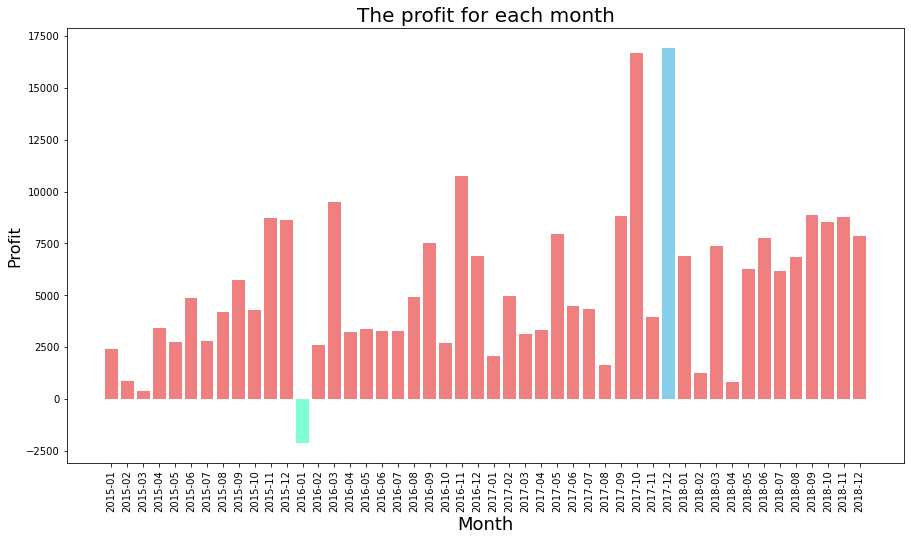

In [124]:
# visualisation code for Q1
# created 3 bars with different values
#    1. for all data
#    2. for maximum profit
#    3. to get the minimum profit
# 3 bars were placed on the same figure with different color
plt.figure(figsize=(15,8))
plt.bar(Q1_profit.month_year, Q1_profit.Profit, color='lightcoral')
plt.bar(Q1_profit.iloc[Q1_profit.Profit.idxmax(),:].month_year, Q1_profit.Profit.max(), color='skyblue')
plt.bar(Q1_profit.iloc[Q1_profit.Profit.idxmin(),:].month_year, Q1_profit.Profit.min(), color='aquamarine')
plt.xticks(rotation=90)
plt.title('The profit for each month', fontsize=20)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Profit', fontsize=16)
plt.show()

Findings: Using this visualization, you can see the maximum and minimum profit for each month, and in the future you will be able to analyze and predict future profits.

### 7.2 Q2: Find the number of deal for each of the top 10 states by sales for each half-year.
1. I found the top 10 states that ordered more than others
2. Only 10 state data were received
3. I divided one year into two parts, and this was done for each year
4. In the end, I found the number of deals for each of the top 10 states

In [125]:
# data preparation for Q2
# grouped by state and using count() determined the number of orders, 
# then sorted it in descending order and received only the first 10 rows
states=pd.DataFrame(sales.groupby('State', as_index=False).count().sort_values('Order_ID', ascending=False)['State'].reset_index(drop=True).head(10))
states

,State
0,California
1,New York
2,Texas
3,Pennsylvania
4,Illinois
5,Washington
6,Ohio
7,Florida
8,Michigan
9,North Carolina


In [126]:
# Using merge(), I combined two dataframes and got data only for the top 10 states that I already selected
Q2=pd.merge(states, sales, how='left', on=['State'])
Q2.head()

,State,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,Postal_Code,...,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,year,month,month_year
0,California,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,90036.0,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714,2017,6,2017-06
1,California,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,90032.0,...,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694,2015,6,2015-06
2,California,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,90032.0,...,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656,2015,6,2015-06
3,California,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,90032.0,...,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152,2015,6,2015-06
4,California,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,90032.0,...,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825,2015,6,2015-06


In [127]:
# Divided into 2 ranges every year (I received half a year). Starting day 01-01-2015 and ending day 01-01-2019
start_date=sales.Order_Date.min()
start_date=start_date.replace(day=1, hour=0, minute=0, second=0, microsecond=0)
end_date=sales.Order_Date.max()
end_date=datetime.date(year=end_date.year+1, month=1, day=1)
date_range=pd.date_range(start=start_date, end=end_date, freq='6MS')
date_range

DatetimeIndex(['2015-01-01', '2015-07-01', '2016-01-01', '2016-07-01',
               '2017-01-01', '2017-07-01', '2018-01-01', '2018-07-01',
               '2019-01-01'],
              dtype='datetime64[ns]', freq='6MS')

In [128]:
# Created range and included corresponding date
bins=date_range
label=date_range.astype(str)
labels=["{} - {}".format(label[i], label[i+1]) for i in range(len(label)-1)]
Q2['date_range'] = pd.cut(Q2.Order_Date, bins, labels=labels)

In [129]:
# Grouped by State and Date range then was found the number of orders
Q2_result=Q2.groupby(by=['State', 'date_range'], as_index=False).Order_ID.count() 
Q2_result.head()

,State,date_range,Order_ID
0,California,2015-01-01 - 2015-07-01,102
1,California,2015-07-01 - 2016-01-01,267
2,California,2016-01-01 - 2016-07-01,108
3,California,2016-07-01 - 2017-01-01,223
4,California,2017-01-01 - 2017-07-01,162


In [130]:
# here just made a pivot table with data 
Q2_result = Q2_result.pivot('State', 'date_range', 'Order_ID')
Q2_result.head()

date_range,2015-01-01 - 2015-07-01,2015-07-01 - 2016-01-01,2016-01-01 - 2016-07-01,2016-07-01 - 2017-01-01,2017-01-01 - 2017-07-01,2017-07-01 - 2018-01-01,2018-01-01 - 2018-07-01,2018-07-01 - 2019-01-01
State,,,,,,,,
California,102,267,108,223,162,288,188,325
Florida,39,43,41,38,29,57,52,73
Illinois,34,62,32,60,63,56,72,93
Michigan,25,19,16,48,9,60,29,38
New York,61,123,66,179,131,179,104,221


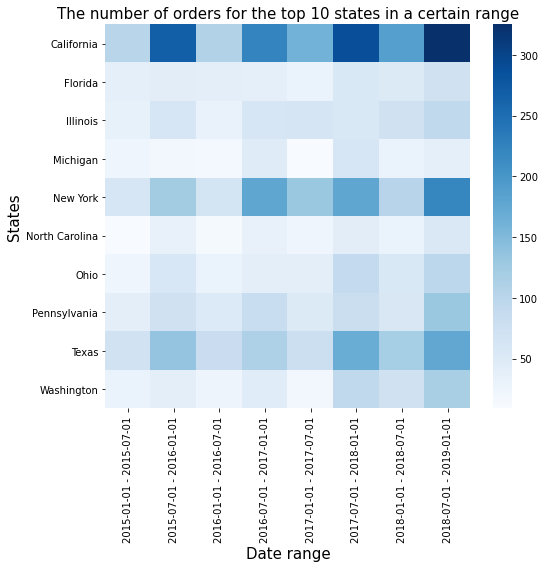

In [131]:
# visualisation code for Q2
# I used heatmap to show relationship between State and date range
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(Q2_result, cmap='Blues', ax=ax)

ax.set_xlabel('Date range', fontsize=15)  
ax.set_ylabel('States', fontsize=15) 
ax.set_title("The number of orders for the top 10 states in a certain range",  fontsize=15)

fig.tight_layout()

Findings: This heat map gives you the opportunity to improve the delivery service of orders to the states, because the map gives you the number of orders for a certain range, and also with its help you can calculate the profit for the states.

### 7.3 Q3: Find the 5 customers for each year who spend the most money on purchases.
I wanted to get 5 customers for each year who spend the most money on purchases. I grouped by year and customer names and found 5 customers with the highest sales for each group

In [132]:
# data preparation for Q3
# grouped by year and customer name and were found 5 customers with the highest sales for each group 
Q3_customer = sales[['Customer_Name', 'year', 'Sales']].groupby(by=['year','Customer_Name'], as_index=False).sum().sort_values(by=['year','Sales'], ascending=[True,False]).groupby('year').head(5).reset_index(drop=True)
Q3_customer.head()

,year,Customer_Name,Sales
0,2015,Sean Miller,23661.228
1,2015,Sanjit Chand,12876.480
2,2015,Becky Martin,10539.896
3,2015,Ken Lonsdale,8694.630
4,2015,Tom Boeckenhauer,8162.510


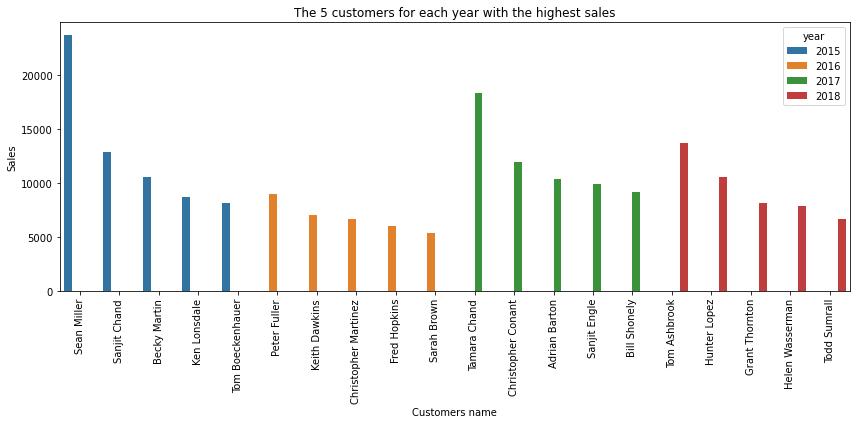

In [133]:
# visualisation code for Q3
fig, axs = plt.subplots(figsize=(12, 6))
ax = sns.barplot(data=Q3_customer,
            x="Customer_Name", 
            y='Sales',
            hue='year',
            ax=axs
           );
ax.set(xlabel='Customers name',
       ylabel='Sales', 
       title='The 5 customers for each year with the highest sales')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
fig.tight_layout()

Findings: This bar shows the 5 customers with the most money spent for each year. Using this data, we can roughly guess who brought more profit. Also the company can organize a gift among customers (as many companies do now) who bought goods for more than a certain amount. It is also an idea to attract the attention of customers

### 7.4 Q4: Show the percentage of orders received during the holidays.
I used libraries to search for holidays, and then I got a percentage of the orders for the holidays from all the orders

In [134]:
# data preparation for Q4
# using specific library USFederalHolidayCalendar from pandas.tseries.holiday I found holidays in my order date
cal = calendar()
holidays = cal.holidays(start=sales.Order_Date.min(), end=sales.Order_Date.max())
holidays

DatetimeIndex(['2015-01-19', '2015-02-16', '2015-05-25', '2015-07-03',
               '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26',
               '2015-12-25', '2016-01-01', '2016-01-18', '2016-02-15',
               '2016-05-30', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-11-11', '2016-11-24', '2016-12-26', '2017-01-02',
               '2017-01-16', '2017-02-20', '2017-05-29', '2017-07-04',
               '2017-09-04', '2017-10-09', '2017-11-10', '2017-11-23',
               '2017-12-25', '2018-01-01', '2018-01-15', '2018-02-19',
               '2018-05-28', '2018-07-04', '2018-09-03', '2018-10-08',
               '2018-11-12', '2018-11-22', '2018-12-25'],
              dtype='datetime64[ns]', freq=None)

In [135]:
# added a new column with a boolean value (True if the order date is holidays, False if not)
sales['holiday'] = sales.Order_Date.isin(holidays)
sales.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Postal_Code,...,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,year,month,month_year,holiday
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2017,11,2017-11,False
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420.0,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2017,11,2017-11,False
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036.0,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2017,6,2017-06,False
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2016,10,2016-10,False
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311.0,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2016,10,2016-10,False


In [136]:
# grouped by holiday column which in tern to find amount of orders on holidays
Q4 = sales[['holiday', 'Order_ID']].groupby('holiday').count()
Q4

,Order_ID
holiday,
False,8886
True,297


In [137]:
# changed boolean values to holidays and week day respectively
def day_name(holiday):
    hol = []
    for i in holiday:
        if i==True:
            hol.append('Holidays')
        else:
            hol.append('Week day')
    return hol

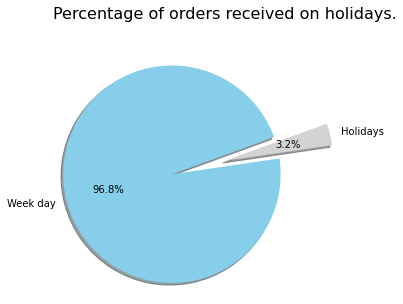

In [138]:
# visualisation code for Q4
plt.figure(figsize=(5,5))
my_labels = day_name(Q4.index)
my_colors = ['skyblue','lightgrey']
my_explode = (0.5, 0)
plt.pie(Q4.Order_ID, 
        labels=my_labels, 
        autopct='%1.1f%%', 
        startangle=20, 
        shadow=True, 
        colors=my_colors, 
        explode=my_explode)
plt.title('Percentage of orders received on holidays.', fontsize=16)
plt.show()

Findings: The percentage of orders received on holidays shows how many customers make transactions on holidays. If we consider the number of holidays in this dataset, then 3.2 percent is a relatively large number

### 7.5 Q5: Show the number of distinct types of products ordered by each segment.

In [139]:
# data preparation for Q5
# grouped by segment and category to find quantity for each group
Q5=sales.groupby(by=['Segment', 'Category'], as_index=False).Quantity.sum()
Q5.head()

,Segment,Category,Quantity
0,Consumer,Furniture,3817
1,Consumer,Office Supplies,10791
2,Consumer,Technology,3287
3,Corporate,Furniture,2280
4,Corporate,Office Supplies,6392


In [140]:
# made pivot table in order to draw plot
Q5_piv=Q5.pivot(index='Segment', columns='Category', values='Quantity')
Q5_piv.head()

Category,Furniture,Office Supplies,Technology
Segment,,,
Consumer,3817,10791,3287
Corporate,2280,6392,1919
Home Office,1269,3860,1155


Text(0, 0.5, 'Quantities')

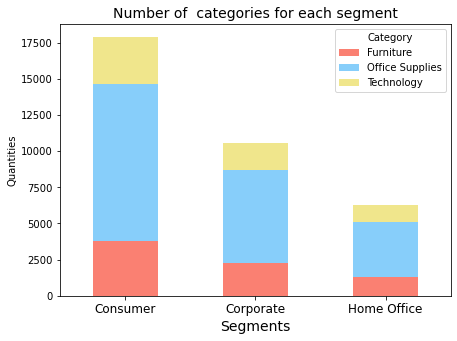

In [141]:
# visualisation code for Q5
fig, ax = plt.subplots(figsize=(7,5))
graph = Q5_piv.plot.bar(stacked = True, color = ['salmon','lightskyblue','khaki'], ax = ax)

graph.set_xticklabels(labels=Q5_piv.index, rotation = 0, fontsize = 12)

graph.set_title('Number of  categories for each segment', fontsize = 14)
graph.set_xlabel('Segments', fontsize = 14)
graph.set_ylabel('Quantities', fontsize = 10)

Findings: The bar shows the number of categories for each segment. As you can see, there are more office supplies than others for each type of customer, and technologies and furniture are about the same quantity, and consumers order more than others in the period 2015-2019.

### 7.6 Q6: Using sample show the profits from each discount.
I chose a sample (size is 300) to determine which discount is convenient for the company

In [142]:
# data preparation for Q6
# selected sample with 300 rondomly values
# then it was grouped by discount to find sum of profit for each discount 
Q6_sample = sales.sample(n=300)
Q6 = Q6_sample[['Discount', 'Profit']].groupby('Discount').sum()
Q6.head()

,Profit
Discount,
0.00,6448.4527
0.10,188.6916
0.15,84.2940
0.20,3126.2524
0.30,-626.4460


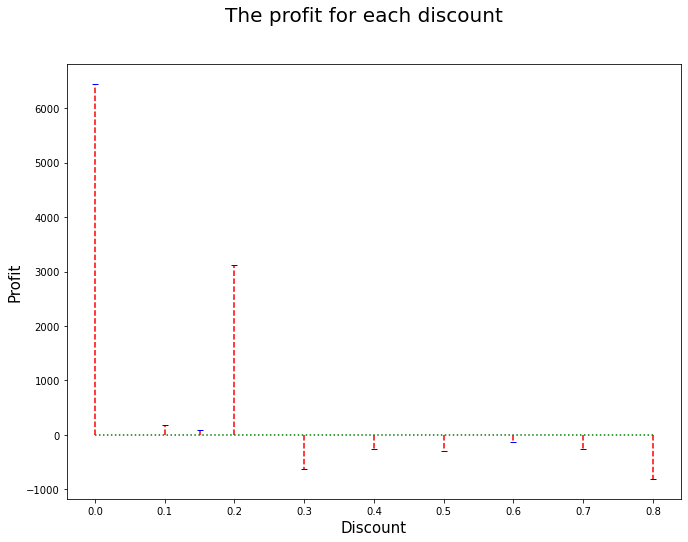

In [143]:
# visualisation code for Q5
plt.figure(figsize=(11,8))
plt.stem(Q6.index, 
        Q6.Profit, 
        markerfmt='b_',
        linefmt='r--', 
        basefmt='g:')

plt.suptitle('The profit for each discount', fontsize=20)
plt.xlabel('Discount', fontsize=15)
plt.ylabel('Profit', fontsize=15)

plt.show()

Findings: The stem plot show that, as far as the company makes big discounts, the more they will lose money, more precisely, the profit goes into negative. Discounts from 0 to 20 percent are convenient for a company in the market to get enough profit.

### 5.7 Q:7 Find the number of subcategories for the technology for each year.
I wanted to find the number of technology types for each year. The first step was to take the technology data and then draw a histogram.

In [144]:
# data preparation for Q6
# was selected only technologies
Q7 = sales[sales.Category=='Technology']
Q7.head(3)

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Postal_Code,...,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,year,month,month_year,holiday
7,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,90032.0,...,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152,2015,6,2015-06,False
11,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,90032.0,...,Phones,Konftel 250 Conference phone - Charcoal black,911.424,4,0.2,68.3568,2015,6,2015-06,False
26,CA-2017-121755,2017-01-16,2017-01-20,Second Class,EH-13945,Eric Hoffmann,Consumer,Los Angeles,California,90049.0,...,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570,3,0.0,11.7741,2017,1,2017-01,True


Text(0.5, 0.98, 'The number of technology"s subcategories for each year')

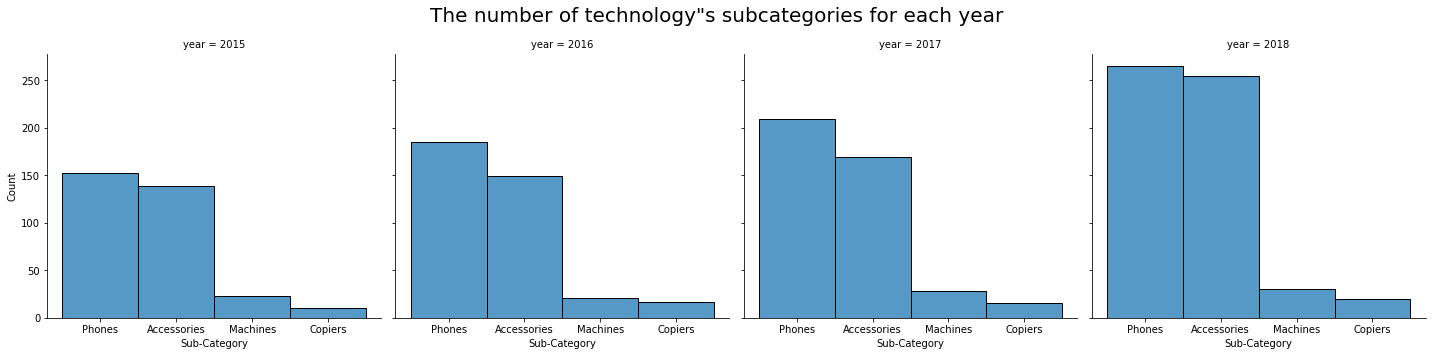

In [145]:
Q7_pl=sns.displot(data=Q7, kind='hist',
            x='Sub-Category', 
            col='year',
           );
Q7_pl.fig.subplots_adjust(top=0.85)
Q7_pl.fig.suptitle('The number of technology"s subcategories for each year', fontsize=20)

Findings: The histogram shows the number of technology types for each year. In conclusion, we can say that the number of ordered phones and accessories is steadily growing every year, but we do not see a large increase in machines and copiers.

## 6. Conclusion
In conclusion, using them, we can determine the most frequently ordered seats and what technologies are becoming popular. It was also shown to what extent a discount should be made in order to get a good profit. The analyzed data will help focus on the company's development in customer relationships. For example, if a company wants to open a branch and attract the attention of customers, they can use this analysis.